In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
Data = pd.read_csv("D:\PYTHON\GENERATIVE AI\LSTM RNN and GRU\AI_Human.csv")

In [27]:
Data.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [28]:
Data.shape

(487235, 2)

In [29]:
texts = Data['text'].values
labels = Data['generated'].values

<Axes: xlabel='generated', ylabel='count'>

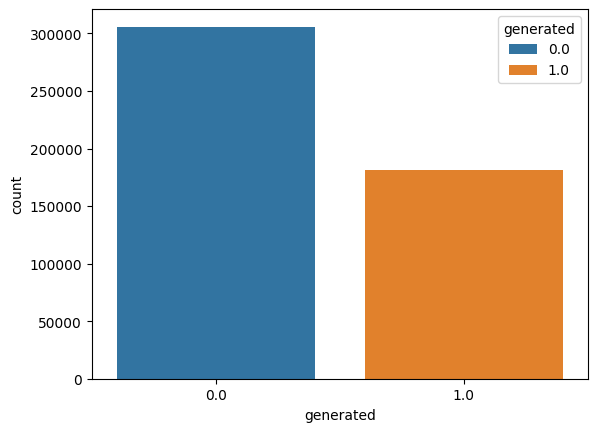

In [30]:
sns.countplot(data=Data, x="generated", hue="generated", )

In [31]:
print('Total Texts:', Data['generated'].count())
print('Human Written Texts:', (Data['generated'] == 0.0).sum())
print('AI Generated Texts:', (Data['generated'] == 1.0).sum())


Total Texts: 487235
Human Written Texts: 305797
AI Generated Texts: 181438


In [32]:
Max_Words = 20000
Max_len = 100
Tokenizer = Tokenizer(num_words= Max_Words)
Tokenizer.fit_on_texts(texts)

In [33]:
sequences = Tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=Max_len, padding="pre")

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [35]:
del X
del labels

In [36]:
Embedding_Dim = 100

In [37]:
Model = Sequential([
    Embedding(input_dim=Max_Words, output_dim=Embedding_Dim, input_length=Max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

d:\PYTHON\GENERATIVE AI\GENAI\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [38]:
Model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [39]:
Model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
      history = Model.fit(X_train, Y_train, batch_size=128, epochs=5, 
                    validation_data=(X_test, Y_test))

Epoch 1/5
3046/3046 ━━━━━━━━━━━━━━━━━━━━ 466s 153ms/step - accuracy: 0.9909 - loss: 0.0313 - val_accuracy: 0.9954 - val_loss: 0.0191
Epoch 2/5
3046/3046 ━━━━━━━━━━━━━━━━━━━━ 426s 140ms/step - accuracy: 0.9960 - loss: 0.0138 - val_accuracy: 0.9961 - val_loss: 0.0183
Epoch 3/5
3046/3046 ━━━━━━━━━━━━━━━━━━━━ 433s 142ms/step - accuracy: 0.9978 - loss: 0.0080 - val_accuracy: 0.9966 - val_loss: 0.0124
Epoch 4/5
3046/3046 ━━━━━━━━━━━━━━━━━━━━ 467s 153ms/step - accuracy: 0.9982 - loss: 0.0059 - val_accuracy: 0.9966 - val_loss: 0.0142
Epoch 5/5
3046/3046 ━━━━━━━━━━━━━━━━━━━━ 539s 177ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9977 - val_loss: 0.0090


In [42]:
loss, accuracy = Model.evaluate(X_test, Y_test, batch_size=128)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

762/762 ━━━━━━━━━━━━━━━━━━━━ 51s 67ms/step - accuracy: 0.9980 - loss: 0.0076
Test Accuracy: 99.77%


In [43]:
Model.save('text_classification_lstm.h5')


with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(Tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


with open('training_history.pkl', 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)